In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import cv2
import PIL
import pydicom as dicom
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Flatten, AveragePooling2D
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from sklearn.decomposition import PCA

In [2]:
nodCount = pd.read_excel("lidc-idri nodule counts (6-23-2015).xlsx",sheet_name = 'Sheet1')

In [3]:
nodCount.isnull().any()

TCIA Patent ID                True
Total Number of Nodules*     False
Number of Nodules >=3mm**    False
Number of Nodules <3mm***    False
Unnamed: 4                    True
Unnamed: 5                    True
dtype: bool

In [4]:
nodCount.drop(['Unnamed: 4','Unnamed: 5'], inplace = True,axis=1)

In [5]:
nodCount = nodCount.dropna(axis=0)


In [6]:
patID = nodCount["TCIA Patent ID"]

In [7]:
totalNodules = nodCount["Total Number of Nodules* "]

In [8]:
noNodules = []
position= 0
for i in totalNodules:
    if i == 0:
        noNodules.append(patID[position])
    position+=1
print(noNodules)    

['LIDC-IDRI-0306', 'LIDC-IDRI-0307', 'LIDC-IDRI-0322', 'LIDC-IDRI-0364', 'LIDC-IDRI-0441', 'LIDC-IDRI-0506', 'LIDC-IDRI-0540', 'LIDC-IDRI-0564', 'LIDC-IDRI-0573', 'LIDC-IDRI-0612', 'LIDC-IDRI-0668', 'LIDC-IDRI-0689', 'LIDC-IDRI-0716', 'LIDC-IDRI-0731', 'LIDC-IDRI-0760', 'LIDC-IDRI-0887', 'LIDC-IDRI-0900', 'LIDC-IDRI-0937', 'LIDC-IDRI-0975', 'LIDC-IDRI-0995']


In [9]:
hvNodules = []
position = 0
for i in totalNodules:
    if i != 0:
        hvNodules.append(patID[position])
    position+=1 
print(hvNodules)
    

['LIDC-IDRI-0001', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004', 'LIDC-IDRI-0005', 'LIDC-IDRI-0006', 'LIDC-IDRI-0007', 'LIDC-IDRI-0008', 'LIDC-IDRI-0009', 'LIDC-IDRI-0010', 'LIDC-IDRI-0011', 'LIDC-IDRI-0012', 'LIDC-IDRI-0013', 'LIDC-IDRI-0014', 'LIDC-IDRI-0015', 'LIDC-IDRI-0016', 'LIDC-IDRI-0017', 'LIDC-IDRI-0018', 'LIDC-IDRI-0019', 'LIDC-IDRI-0020', 'LIDC-IDRI-0021', 'LIDC-IDRI-0022', 'LIDC-IDRI-0023', 'LIDC-IDRI-0024', 'LIDC-IDRI-0025', 'LIDC-IDRI-0026', 'LIDC-IDRI-0027', 'LIDC-IDRI-0028', 'LIDC-IDRI-0029', 'LIDC-IDRI-0030', 'LIDC-IDRI-0031', 'LIDC-IDRI-0032', 'LIDC-IDRI-0033', 'LIDC-IDRI-0034', 'LIDC-IDRI-0035', 'LIDC-IDRI-0036', 'LIDC-IDRI-0037', 'LIDC-IDRI-0038', 'LIDC-IDRI-0039', 'LIDC-IDRI-0040', 'LIDC-IDRI-0041', 'LIDC-IDRI-0042', 'LIDC-IDRI-0043', 'LIDC-IDRI-0044', 'LIDC-IDRI-0045', 'LIDC-IDRI-0046', 'LIDC-IDRI-0047', 'LIDC-IDRI-0048', 'LIDC-IDRI-0049', 'LIDC-IDRI-0050', 'LIDC-IDRI-0051', 'LIDC-IDRI-0052', 'LIDC-IDRI-0053', 'LIDC-IDRI-0054', 'LIDC-IDRI-0055', 'LIDC-IDR

In [10]:
os.mkdir("Zero Nodules")

In [11]:
os.mkdir("Potentially Cancerous")


In [12]:
ORIGIN = "C:/Users/Hp/Documents/Data Science/LIDC/LIDC-IDRI"


In [15]:
folders = []
for f in os.listdir(ORIGIN):
    folders.append(f)

In [18]:
POTENTIALLY_CANCEROUS = []
ZERO_NODULES = []
count = 0
for folder in folders:
    if folder in hvNodules:
        POTENTIALLY_CANCEROUS.append(folder)
    else: 
        ZERO_NODULES.append(folder)
    count+=1

In [19]:
for i in POTENTIALLY_CANCEROUS:
    shutil.move((ORIGIN+'/'+i),"Potentially Cancerous")
    
for i  in ZERO_NODULES:
    shutil.move((ORIGIN+'/'+i),'Zero Nodules')

    

In [20]:
def convert_NoNodules():
    dcm_path = "C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules"
    jpg_path = "C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images"
    patients = os.listdir(dcm_path)
    images_path = []
    os.mkdir(jpg_path)
    for i in patients:
      ##  images_path.append(os.path.join(dcm_path,i))
        images_path.append((dcm_path+"/"+i))
    for patient in images_path:
        print(patient)
        for img in os.listdir(patient):
            print(img)
            print(patient+'/'+img)
            ds = dicom.dcmread((patient+'/'+img),force = False)
            pixel_array_numpy = ds.pixel_array
            img = img.replace('.dcm','.png')
            os.chdir(jpg_path)
            cv2.imwrite(img,pixel_array_numpy)
            pixel_array = cv2.imread(img)
            print("done")

    

In [28]:
def convert_hvNodules():
    dcm_path = "C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous"
    jpg_path = "C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images"
    patients = os.listdir(dcm_path)
    images_path = []
    count = 0
    #os.mkdir(jpg_path)
    for i in patients:
      ##  images_path.append(os.path.join(dcm_path,i))
        images_path.append((dcm_path+"/"+i))
    for patient in images_path:
        print(patient)
        for img in os.listdir(patient):
            print(img)
            print(patient+'/'+img)
            ds = dicom.dcmread((patient+'/'+img),force = False)
            pixel_array_numpy = ds.pixel_array
            img = img.replace('.dcm','.png')
            os.chdir(jpg_path)
            cv2.imwrite(img,pixel_array_numpy)
            pixel_array = cv2.imread(img)
            print("done")
            count+=1
            print(count)
        
        #if n%50 == 0:
           # print('{} image converted'.format(n))

    
    

In [29]:
convert_hvNodules()

C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001
1-001.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-001.dcm
done
1
1-002.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-002.dcm
done
2
1-003.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-003.dcm
done
3
1-004.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-004.dcm
done
4
1-005.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-005.dcm
done
5
1-006.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-006.dcm
done
6
1-007.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-007.dcm
done
7
1-008.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-008.dcm
done
8
1-009.dcm
C:/Users/Hp/

done
77
1-078.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-078.dcm
done
78
1-079.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-079.dcm
done
79
1-080.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-080.dcm
done
80
1-081.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-081.dcm
done
81
1-082.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-082.dcm
done
82
1-083.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-083.dcm
done
83
1-084.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-084.dcm
done
84
1-085.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-085.dcm
done
85
1-086.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-086.dcm
done
86
1-087.dcm
C:/Users/Hp/Documents/Data Science/LI

done
156
1-024.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-024.dcm
done
157
1-025.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-025.dcm
done
158
1-026.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-026.dcm
done
159
1-027.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-027.dcm
done
160
1-028.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-028.dcm
done
161
1-029.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-029.dcm
done
162
1-030.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-030.dcm
done
163
1-031.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-031.dcm
done
164
1-032.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-032.dcm
done
165
1-033.dcm
C:/Users/Hp/Documents/Data 

done
244
1-112.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-112.dcm
done
245
1-113.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-113.dcm
done
246
1-114.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-114.dcm
done
247
1-115.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-115.dcm
done
248
1-116.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-116.dcm
done
249
1-117.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-117.dcm
done
250
1-118.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-118.dcm
done
251
1-119.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-119.dcm
done
252
1-120.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-120.dcm
done
253
1-121.dcm
C:/Users/Hp/Documents/Data 

done
322
1-190.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-190.dcm
done
323
1-191.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-191.dcm
done
324
1-192.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-192.dcm
done
325
1-193.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-193.dcm
done
326
1-194.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-194.dcm
done
327
1-195.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-195.dcm
done
328
1-196.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-196.dcm
done
329
1-197.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-197.dcm
done
330
1-198.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-198.dcm
done
331
1-199.dcm
C:/Users/Hp/Documents/Data 

done
405
1-012.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-012.dcm
done
406
1-013.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-013.dcm
done
407
1-014.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-014.dcm
done
408
1-015.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-015.dcm
done
409
1-016.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-016.dcm
done
410
1-017.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-017.dcm
done
411
1-018.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-018.dcm
done
412
1-019.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-019.dcm
done
413
1-020.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-020.dcm
done
414
1-021.dcm
C:/Users/Hp/Documents/Data 

done
483
1-090.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-090.dcm
done
484
1-091.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-091.dcm
done
485
1-092.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-092.dcm
done
486
1-093.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-093.dcm
done
487
1-094.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-094.dcm
done
488
1-095.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-095.dcm
done
489
1-096.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-096.dcm
done
490
1-097.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-097.dcm
done
491
1-098.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-098.dcm
done
492
1-099.dcm
C:/Users/Hp/Documents/Data 

done
562
1-029.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-029.dcm
done
563
1-030.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-030.dcm
done
564
1-031.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-031.dcm
done
565
1-032.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-032.dcm
done
566
1-033.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-033.dcm
done
567
1-034.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-034.dcm
done
568
1-035.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-035.dcm
done
569
1-036.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-036.dcm
done
570
1-037.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-037.dcm
done
571
1-038.dcm
C:/Users/Hp/Documents/Data 

done
640
1-107.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-107.dcm
done
641
1-108.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-108.dcm
done
642
1-109.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-109.dcm
done
643
1-110.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-110.dcm
done
644
1-111.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-111.dcm
done
645
1-112.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-112.dcm
done
646
1-113.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-113.dcm
done
647
1-114.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-114.dcm
done
648
1-115.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-115.dcm
done
649
1-116.dcm
C:/Users/Hp/Documents/Data 

done
718
1-185.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-185.dcm
done
719
1-186.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-186.dcm
done
720
1-187.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-187.dcm
done
721
1-188.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-188.dcm
done
722
1-189.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-189.dcm
done
723
1-190.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-190.dcm
done
724
1-191.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-191.dcm
done
725
1-192.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-192.dcm
done
726
1-193.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-193.dcm
done
727
1-194.dcm
C:/Users/Hp/Documents/Data 

KeyboardInterrupt: 

In [30]:
convert_NoNodules()

C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306
1-001.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-001.dcm
done
1-002.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-002.dcm
done
1-003.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-003.dcm
done
1-004.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-004.dcm
done
1-005.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-005.dcm
done
1-006.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-006.dcm
done
1-007.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-007.dcm
done
1-008.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-008.dcm
done
1-009.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-009.dcm
done
1-010.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-010.dcm
done
1-

done
1-089.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-089.dcm
done
1-090.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-090.dcm
done
1-091.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-091.dcm
done
1-092.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-092.dcm
done
1-093.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-093.dcm
done
1-094.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-094.dcm
done
1-095.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-095.dcm
done
1-096.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-096.dcm
done
1-097.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-097.dcm
done
1-098.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0306/1-098.dcm
done
1-099.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-055.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-055.dcm
done
1-056.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-056.dcm
done
1-057.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-057.dcm
done
1-058.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-058.dcm
done
1-059.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-059.dcm
done
1-060.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-060.dcm
done
1-061.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-061.dcm
done
1-062.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-062.dcm
done
1-063.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-063.dcm
done
1-064.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-064.dcm
done
1-065.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-144.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-144.dcm
done
1-145.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-145.dcm
done
1-146.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-146.dcm
done
1-147.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-147.dcm
done
1-148.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-148.dcm
done
1-149.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-149.dcm
done
1-150.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-150.dcm
done
1-151.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-151.dcm
done
1-152.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-152.dcm
done
1-153.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-153.dcm
done
1-154.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-234.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-234.dcm
done
1-235.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-235.dcm
done
1-236.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-236.dcm
done
1-237.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-237.dcm
done
1-238.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-238.dcm
done
1-239.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-239.dcm
done
1-240.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-240.dcm
done
1-241.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-241.dcm
done
1-242.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-242.dcm
done
1-243.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0307/1-243.dcm
done
1-244.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

1-059.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-059.dcm
done
1-060.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-060.dcm
done
1-061.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-061.dcm
done
1-062.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-062.dcm
done
1-063.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-063.dcm
done
1-064.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-064.dcm
done
1-065.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-065.dcm
done
1-066.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-066.dcm
done
1-067.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-067.dcm
done
1-068.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0322/1-068.dcm
done
1-069.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-ID

done
1-023.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-023.dcm
done
1-024.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-024.dcm
done
1-025.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-025.dcm
done
1-026.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-026.dcm
done
1-027.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-027.dcm
done
1-028.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-028.dcm
done
1-029.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-029.dcm
done
1-030.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-030.dcm
done
1-031.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-031.dcm
done
1-032.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-032.dcm
done
1-033.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-116.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-116.dcm
done
1-117.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-117.dcm
done
1-118.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-118.dcm
done
1-119.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-119.dcm
done
1-120.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-120.dcm
done
1-121.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0364/1-121.dcm
done
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441
1-001.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-001.dcm
done
1-002.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-002.dcm
done
1-003.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-003.dcm
done
1-004.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-004.dcm
do

done
1-086.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-086.dcm
done
1-087.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-087.dcm
done
1-088.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-088.dcm
done
1-089.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-089.dcm
done
1-090.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-090.dcm
done
1-091.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-091.dcm
done
1-092.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-092.dcm
done
1-093.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-093.dcm
done
1-094.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-094.dcm
done
1-095.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-095.dcm
done
1-096.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-176.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-176.dcm
done
1-177.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-177.dcm
done
1-178.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-178.dcm
done
1-179.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-179.dcm
done
1-180.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-180.dcm
done
1-181.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-181.dcm
done
1-182.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-182.dcm
done
1-183.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-183.dcm
done
1-184.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-184.dcm
done
1-185.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-185.dcm
done
1-186.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-267.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-267.dcm
done
1-268.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-268.dcm
done
1-269.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-269.dcm
done
1-270.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-270.dcm
done
1-271.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-271.dcm
done
1-272.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-272.dcm
done
1-273.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-273.dcm
done
1-274.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-274.dcm
done
1-275.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-275.dcm
done
1-276.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-276.dcm
done
1-277.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-358.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-358.dcm
done
1-359.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-359.dcm
done
1-360.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-360.dcm
done
1-361.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-361.dcm
done
1-362.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-362.dcm
done
1-363.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-363.dcm
done
1-364.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-364.dcm
done
1-365.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-365.dcm
done
1-366.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-366.dcm
done
1-367.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-367.dcm
done
1-368.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-449.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-449.dcm
done
1-450.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-450.dcm
done
1-451.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-451.dcm
done
1-452.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-452.dcm
done
1-453.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-453.dcm
done
1-454.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-454.dcm
done
1-455.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-455.dcm
done
1-456.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-456.dcm
done
1-457.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-457.dcm
done
1-458.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-458.dcm
done
1-459.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-538.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-538.dcm
done
1-539.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-539.dcm
done
1-540.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-540.dcm
done
1-541.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-541.dcm
done
1-542.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-542.dcm
done
1-543.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-543.dcm
done
1-544.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-544.dcm
done
1-545.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-545.dcm
done
1-546.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-546.dcm
done
1-547.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-547.dcm
done
1-548.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

done
1-628.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-628.dcm
done
1-629.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-629.dcm
done
1-630.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-630.dcm
done
1-631.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-631.dcm
done
1-632.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-632.dcm
done
1-633.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-633.dcm
done
1-634.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-634.dcm
done
1-635.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-635.dcm
done
1-636.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-636.dcm
done
1-637.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LIDC-IDRI-0441/1-637.dcm
done
1-638.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/LI

ValueError: The length of the pixel data in the dataset (510096 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.

In [31]:
ZERO_NODULES_IMG_PATH =  "C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images"

In [32]:
POTENTIALLY_CANCEROUS_IMG_PATH =  "C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images"

In [37]:
countImgwithNodules = 0
for img in os.listdir("C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images"):
    countImgwithNodules+=1

In [38]:
countImgwithoutNodules = 0
for img in os.listdir("C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images"):
    countImgwithoutNodules+=1

In [39]:
print(countImgwithNodules)
print(countImgwithoutNodules)

261
657


In [36]:
if(countImgwithoutNodules > countImgwithNodules):
    for i in os.listdir(ZERO_NODULES_IMG_PATH):    
        img_file = cv2.imread((POTENTIALLY_CANCEROUS_IMG_PATH + "/"+i))
        print(POTENTIALLY_CANCEROUS_IMG_PATH + "/"+i)
        img = img_to_array(img_file)
        img = np.expand_dims(img,axis=0)
        aug = ImageDataGenerator(zoom_range = 0.15,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                shear_range = 0.15,
                                horizontal_flip = True,
                                fill_mode = 'nearest')
        img_gen = aug.flow(img, batch_size = 1,save_to_dir = POTENTIALLY_CANCEROUS_IMG_PATH,save_prefix = "aug_img",save_format = 'jpg')
        
    

C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-001.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-002.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-003.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-004.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-005.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-006.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-007.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-008.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-009.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-010.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-011.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-012.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially 

C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-108.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-109.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-110.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-111.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-112.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-113.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-114.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-115.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-116.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-117.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-118.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-119.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially 

C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-235.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-236.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-237.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-238.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-239.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-240.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-241.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-242.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-243.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-244.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-245.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/1-246.png
C:/Users/Hp/Documents/Data Science/LIDC/Potentially 

ValueError: Unsupported image shape: ()

In [40]:
X = []
y = []

In [41]:
for i in os.listdir('C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images'):
    img_array = cv2.imread(('C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/'+i))
    X.append(img_array)
    y.append(0)

In [42]:
for i in os.listdir('C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images'):
    img_array = cv2.imread(('C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images/'+i))
    X.append(img_array)
    y.append(1)


In [43]:
X = np.array(X)
X = X/255
y = np.array(y)

In [89]:
print(y)

[0 0 0 ... 1 1 1]


In [7]:
X.dtype


dtype('float64')

In [7]:
X2 =X[1:,:,0,0] 
print(X2.shape)
print(X2)

(953, 512)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
X3 =X[1:,0,:,0] 
print(X3.shape)
print(X3)

(953, 512)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
X4 =X[1:,0,0,:] 
print(X4.shape)
print(X4)

(953, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [44]:
print(X.shape)
print(y.shape)
print(X)

(918, 512, 512, 3)
(918,)
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]


In [11]:
print(X[0].shape)

(512, 512, 3)


In [20]:
Xfrag = X[:5]
Xfrag.shape
Xfrag[0].shape

(512, 512, 3)

In [21]:
Yfrag = y[:5]

In [90]:
classifier = Sequential()
classifier.add(Conv2D(32,kernel_size=(3,3),input_shape=(512,512,3,),activation = 'relu'))
classifier.add(AveragePooling2D(pool_size=(2,2)))
classifier.add(Flatten())
#classifier.add(Dense(256,activation='relu'))
classifier.add(Dense(1,activation = 'sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 255, 255, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2080800)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2080801   
Total params: 2,081,697
Trainable params: 2,081,697
Non-trainable params: 0
_________________________________________________________________


In [92]:
classifier.fit(X,y,verbose = 1)

29/29 [==============================] - 162s 6s/step - loss: 0.4025 - accuracy: 0.8660


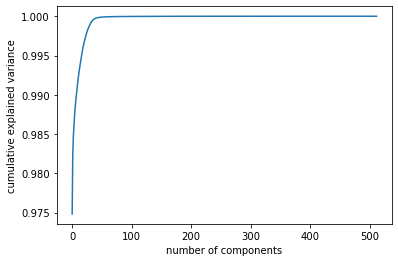

In [10]:
pca = PCA().fit(X2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


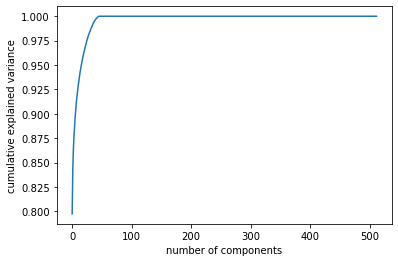

In [17]:
pca = PCA().fit(X3)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


c:\program files\python37\lib\site-packages\sklearn\decomposition\_pca.py:463: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


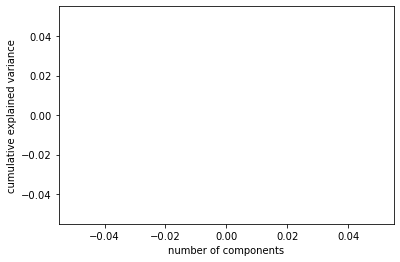

In [18]:
pca = PCA().fit(X4)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [19]:
pca = PCA(50)

In [20]:
X2_new = pca.fit_transform(X2)

In [21]:
print(X2.shape)
print(X2_new.shape)

(953, 512)
(953, 50)


In [22]:
X3_new = pca.fit_transform(X3)

In [23]:
print(X3.shape)
print(X3_new.shape)

(953, 512)
(953, 50)


In [24]:
X_new = X2_new


In [25]:
X_new = np.array(X2_new],[X3_new],[X4]]])


SyntaxError: invalid syntax (<ipython-input-25-0a7f9c88b776>, line 1)

In [ ]:
X_new = np.expand_dims(X3_new,axis=1)

In [ ]:
X_new = np.expand_dims(X,axis =2)

In [ ]:
X_new.shape


In [ ]:
plt.scatter(projected[:,0],projected[:,1],
           #c = y, 
           edgecolor = 'none',
           alpha = 0.5,
           cmap = plt.cm.get_cmap('Accent',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show();

In [78]:
PREDICTION_FOLDER = "C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images"

In [79]:
from tensorflow.keras import backend as K
print(K.image_data_format())

channels_last


In [80]:
positive_count = 0
count = 0
Xpred = []


for i in os.listdir(PREDICTION_FOLDER):
    img = PREDICTION_FOLDER+"/"+i
    img = cv2.imread(img)
    Xpred.append(img_to_array(img))
    count+=1

In [81]:
Xpred = np.array(Xpred)

In [82]:
Xpred.shape

(657, 512, 512, 3)

In [83]:
Xpred = Xpred/255

In [84]:
img_rows=Xpred[0].shape[0]
img_cols=Xpred[0].shape[1]

In [85]:
predictions = classifier.predict((Xpred),verbose = 1)

21/21 [==============================] - 28s 1s/step


In [87]:
print(predictions.shape)

(657, 1)


In [ ]:
classifier.predict_proba(X_pred,verbose = 1)